In [55]:
# 학생의 공부한 시간 / 점수를 표시하는 예제

In [155]:
import pandas as pd

# 공부한 시간 / 점수 
df = pd.DataFrame({'hours': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                   'score': [60, 62, 64, 66, 68, 70, 72, 74, 76, 78]})

In [156]:
# 데이터셋 조회
df

,hours,score
0,1,60
1,2,62
2,3,64
3,4,66
4,5,68
5,6,70
6,7,72
7,8,74
8,9,76
9,10,78


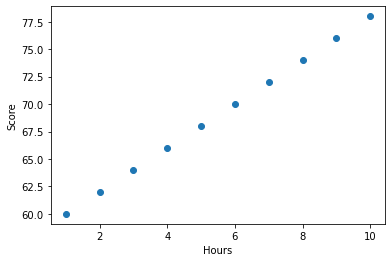

In [157]:
# 데이터를 시각화
import matplotlib.pyplot as plt

plt.scatter(df.hours, df.score)  # 점도표
plt.xlabel('Hours')
plt.ylabel('Score')
plt.show()

In [158]:
# 시각화된 결과를 통해 패턴을 알 수 있다. 
# 머신러닝 기법을 이용해 분석하기 위해 데이터를 분할.

In [159]:
# 학습 데이터 X와 라벨데이터 y 로 데이터 분할
# X = df.loc[:,['hours']]
# y = df.loc[:,['score']] 

In [160]:
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]], dtype=int64)

In [161]:
y

array([[60],
       [63],
       [64],
       [67],
       [68],
       [71],
       [72],
       [75],
       [76],
       [78]], dtype=int64)

In [162]:
X = df[['hours']]
y = df[['score']]

In [163]:
# 데이터를 numpy 포맷으로 변환
X = X.to_numpy ()
y = y.to_numpy ()

In [164]:
# 선형회기 머신러닝 기법 적용
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()     # scikit learn LinearRegression 개체 생성
regressor.fit(X, y)    # fit 메서드를 사용해 모델 트레이닝 실행

LinearRegression()

In [165]:
# 이렇게 regressor 모델을 생성한다.

In [166]:
# 데이터에 없던 값을 넣어 머신러닝 모델이 예측을 잘 하는지 확인.

In [167]:
# 테스트 데이터 생성
test_df = pd.DataFrame({'hours': [12]})  # 학습 데이터에 없던 값

In [168]:
X_test = test_df.to_numpy ()
y_pred = regressor.predict(X_test)
y_pred

array([[82.]])

In [169]:
# 예측을 잘 한다. 
# 하지만, 정확도를 알 수가 없다. 어떻게 해야 할까?

In [170]:
# 정확도를 예측하려면 트레이닝 / 테스트 데이터셋을 분리 

In [171]:
from sklearn.model_selection import train_test_split

# 데이터를 트레이닝 데이터셋과 테스트 데이터셋으로 분리 
X_train, X_test, y_train, y_test = train_test_split(
                                                    X, 
                                                    y, 
                                                    test_size=0.3,    # 7:3의 비율로 분리
                                                    random_state=42
                                                   )


In [172]:
X_train
# 7건의 트레이닝 데이터

array([[ 1],
       [ 8],
       [ 3],
       [10],
       [ 5],
       [ 4],
       [ 7]], dtype=int64)

In [173]:
y_train

array([[60],
       [74],
       [64],
       [78],
       [68],
       [66],
       [72]], dtype=int64)

In [174]:
X_test
# 3건의 테스트 데이터

array([[9],
       [2],
       [6]], dtype=int64)

In [175]:
y_test

array([[76],
       [62],
       [70]], dtype=int64)

In [176]:

regressor = LinearRegression()     # scikit learn LinearRegression 개체 생성
regressor.fit(X_train, y_train)    # fit 메서드를 사용해 모델 트레이닝 실행

y_pred = regressor.predict(X_test)

In [177]:
y_pred

array([[76.],
       [62.],
       [70.]])

In [178]:
X_test

array([[9],
       [2],
       [6]], dtype=int64)

In [180]:
from sklearn import metrics

# MSE - 에러율
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))

Mean Squared Error: 0.0


# 최소제곱법 - 기울기 a를 구하는 방법
- x = [1, 2, 3, 4, 5]
- y = [60, 62, 64, 66, 68]

![](doc_img/a.jpg)

In [183]:
# 코드로 구현
import numpy as np
x = [1, 2, 3, 4, 5]
y = [60, 62, 64, 66, 68]

mx = np.mean(x)
my = np.mean(y)
print(mx, my)

3.0 64.0


In [187]:
divisor = sum([(i-mx)**2 for i in x])

In [186]:
def top(x, mx, y, my):
    d = 0
    for i in range(len(x)):
        d += (x[i] - mx) * (y[i] - my)
    return d

dividend = top(x, mx, y, my)

In [188]:
a = dividend / divisor
a  # 이렇게 기울기를 구할 수 있다.

2.0

In [190]:
# 할일 : 추가 데이터셋를 이용해 - MSE를 확인한다.
df = pd.DataFrame({'hours': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                   'score': [60, 63, 64, 67, 68, 71, 72, 75, 76, 78]})